In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras import regularizers
from tensorflow.keras import utils
from scipy import stats
dataset = pd.read_csv('dataset.csv')
deviceset = pd.read_csv('device.csv')
ecfp = pd.read_csv('ecfp.csv')
krfp = pd.read_csv('krfp.csv')
maccs = pd.read_csv('maccs.csv')
morgan = pd.read_csv('morgan.csv')
rdkit = pd.read_csv('rdkit_desc.csv')
feats = pd.read_csv('feats.csv')

In [2]:
feats.head()

,alkyl_num,frag_sym,HOMO_calc,LUMO_calc,dipole,MPI,surface_min,surface_max,PSA
0,2,1,-5.665071,-1.022318,1.975439,11.42494,-38.62844,53.933991,138.99
1,2,1,-5.146211,-1.007550,1.467697,12.11600,-39.79595,52.674270,200.02
2,4,1,-5.182687,-1.386859,2.954174,12.05384,-40.46879,51.108000,287.91
3,0,0,-8.070575,-1.975575,6.131034,17.92665,-35.95829,45.147690,122.30
4,0,0,-7.655580,-1.919355,3.424702,15.53109,-31.70790,57.597300,107.98


In [3]:
y = deviceset['PCE']
device_desc = deviceset.iloc[:,:-1]
mol_desc = dataset.iloc[:,:13]
device_desc.head()

,control_PCE,anchor_end_BA,anchor_end_CA,anchor_end_F,anchor_end_NO,anchor_end_P,anchor_end_PA,anchor_end_PO,anchor_end_SA,anchor_end_SH,anchor_end_SiO,MetalOxide_ITO,MetalOxide_NiOx,MetalOxide_SnO2,MetalOxide_TiO2,MetalOxide_TiO2,MetalOxide_ZnO
0,19.90,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,19.90,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,20.10,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,14.65,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,14.65,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [4]:
x = pd.concat([krfp,device_desc.iloc[:,0]],axis=1)
inputsize = x.shape[1]

In [5]:
model = Sequential()
model.add(Dense(64, input_shape=(inputsize,), activation='relu',  kernel_regularizer=regularizers.l2(1e-3)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(1e-3)))
model.add(Dense(1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                311168    
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 312225 (1.19 MB)
Trainable params: 312225 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
# model.fit(x_train, y_train, epochs=500, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping])
history = model.fit(x, y, epochs=1000, batch_size=64, validation_split=0.1)

Epoch 1/1000

3/3 [==============================] - 1s 76ms/step - loss: 378.6224 - val_loss: 459.2179
Epoch 2/1000
3/3 [==============================] - 0s 13ms/step - loss: 368.2675 - val_loss: 450.0007
Epoch 3/1000
3/3 [==============================] - 0s 14ms/step - loss: 357.8841 - val_loss: 440.3377
Epoch 4/1000
3/3 [==============================] - 0s 13ms/step - loss: 346.9301 - val_loss: 429.7763
Epoch 5/1000
3/3 [==============================] - 0s 13ms/step - loss: 334.9444 - val_loss: 418.4901
Epoch 6/1000
3/3 [==============================] - 0s 13ms/step - loss: 322.2664 - val_loss: 406.3581
Epoch 7/1000
3/3 [==============================] - 0s 13ms/step - loss: 308.1630 - val_loss: 392.8319
Epoch 8/1000
3/3 [==============================] - 0s 13ms/step - loss: 292.8834 - val_loss: 377.8150
Epoch 9/1000
3/3 [==============================] - 0s 14ms/step - loss: 275.6971 - val_loss: 361.3826
Epoch 10/1000
3/3 [==============================] - 0s 13ms/step - loss

In [8]:
model.save('krfp_all.h5')

d:\anaconda3\envs\nn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE: ", np.sqrt(mean_squared_error(y, model.predict(x))))
print(f"R2: {r2_score(y, model.predict(x))}")


6/6 [==============================] - 0s 997us/step
RMSE:  0.5830530436514002
6/6 [==============================] - 0s 1ms/step
R2: 0.9745695335540135


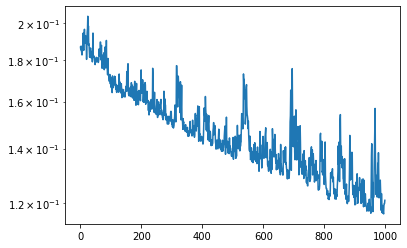

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.yscale('log')